# EXPRESIONES REGULARES Y VECTORIZACIÓN DE DOCUMENTOS

Angel Israel Hernandez Testa<br>
5BV1 TLN-IA<br>
2022630048

### PARTE 1. IDENTIFICACIÓN, SUBSTITUCIÓN Y/O INSERCIÓN DE TEXTO USANDO EXPRESIONES REGULARES

Para el texto contenido en el archivo “expenses.txt” y únicamente para los numerales 1
a 5, identificar las líneas que cumplan con los siguientes:

In [ ]:
import re

text_expenses='''
Amount:Category:Date:Description
5.25:supply:20170222:box of staples
79.81:meal:20170222:lunch with ABC Corp. clients Al, Bob, and Cy
43.00:travel:20170222:cab back to office
383.75:travel:20170223:flight to Boston, to visit ABC Corp.
55.00:travel:20170223:cab to ABC Corp. in Cambridge, MA
23.25:meal:20170223:dinner at Logan Airport
318.47:supply:20170224:paper, toner, pens, paperclips, tape
142.12:meal:20170226:host dinner with ABC clients, Al, Bob, Cy, Dave, Ellie
303.94:util:20170227:Peoples Gas
121.07:util:20170227:Verizon Wireless
7.59:supply:20170227:Python book (used)
79.99:supply:20170227:spare 20" monitor
49.86:supply:20170228:Stoch Cal for Finance II
6.53:meal:20170302:Dunkin Donuts, drive to Big Inc. near DC
127.23:meal:20170302:dinner, Tavern64
33.07:meal:20170303:dinner, Uncle Julio's
86.00:travel:20170304:mileage, drive to/from Big Inc., Reston, VA
22.00:travel:20170304:tolls
378.81:travel:20170304:Hyatt Hotel, Reston VA, for Big Inc. meeting
1247.49:supply:20170306:Dell 7000 laptop/workstation
6.99:supply:20170306:HDMI cable
212.06:util:20170308:Duquesne Light
23.86:supply:20170309:Practical Guide to Quant Finance Interviews
195.89:supply:20170309:black toner, HP 304A, 2-pack
86.00:travel:20170317:mileage, drive to/from Big Inc., Reston, VA
32.27:meal:20170317:lunch at Clyde's with Fred and Gina, Big Inc.
22.00:travel:20170317:tolls
119.56:util:20170319:Verizon Wireless
284.23:util:20170323:Peoples Gas
8.98:supply:20170325:Flair pens
'''
def show_matches(regex,text):
  pattern=re.compile(regex)
  matches=pattern.finditer(text)
  for match in matches:
    print(match.group(0))

def show_matches_i(regex, text):
    pattern = re.compile(regex, re.IGNORECASE | re.MULTILINE)
    matches = pattern.finditer(text)
    for match in matches:
        print(match.group(0))


1. Contengan una “r” seguida por una “g”. La “r” y la “g” no necesariamente tienen
que estar en posiciones consecutivas.

In [ ]:
regex = r'.*r.*g.*'
show_matches_i(regex, text_expenses)

383.75:travel:20170223:flight to Boston, to visit ABC Corp.
55.00:travel:20170223:cab to ABC Corp. in Cambridge, MA
23.25:meal:20170223:dinner at Logan Airport
6.53:meal:20170302:Dunkin Donuts, drive to Big Inc. near DC
86.00:travel:20170304:mileage, drive to/from Big Inc., Reston, VA
378.81:travel:20170304:Hyatt Hotel, Reston VA, for Big Inc. meeting
23.86:supply:20170309:Practical Guide to Quant Finance Interviews
86.00:travel:20170317:mileage, drive to/from Big Inc., Reston, VA
32.27:meal:20170317:lunch at Clyde's with Fred and Gina, Big Inc.


2. Describan comidas que cuesten al menos 100.00.

In [ ]:
regex = r'(\d{3}\.\d{2}:meal:[^:]*:[^:]*)(?:$|\n)'
show_matches(regex, text_expenses)

142.12:meal:20170226:host dinner with ABC clients, Al, Bob, Cy, Dave, Ellie

127.23:meal:20170302:dinner, Tavern64



3. Contengan una “a”, seguida por una “b”, seguida por una “c” puede haber otros caracteres entre la “a” y la ”b” y entre la “b” y la ”c”. En caso de existir caracteres entre las letras indicadas, dichos caracteres no pueden ser a ni b, ni b y c, respectivamente. Ejemplos de cadenas invalidas: “A apple, a banana”; “Bad but beatiful car”

In [ ]:
regex = r'.*a[^abc]*b[^ab]*c.*'
show_matches_i(regex, text_expenses)

79.81:meal:20170222:lunch with ABC Corp. clients Al, Bob, and Cy
383.75:travel:20170223:flight to Boston, to visit ABC Corp.
55.00:travel:20170223:cab to ABC Corp. in Cambridge, MA
318.47:supply:20170224:paper, toner, pens, paperclips, tape
142.12:meal:20170226:host dinner with ABC clients, Al, Bob, Cy, Dave, Ellie
6.53:meal:20170302:Dunkin Donuts, drive to Big Inc. near DC
86.00:travel:20170304:mileage, drive to/from Big Inc., Reston, VA
22.00:travel:20170304:tolls
378.81:travel:20170304:Hyatt Hotel, Reston VA, for Big Inc. meeting
86.00:travel:20170317:mileage, drive to/from Big Inc., Reston, VA
32.27:meal:20170317:lunch at Clyde's with Fred and Gina, Big Inc.


4. Contengan en la descripción de gastos una “a” minúscula y un digito entre 0 y 9
en cualquier orden. Es decir, el carácter “a” puede aparecer antes o después del
digito.

In [ ]:
regex = r'^[^:]*:[^:]*:[^:]*:.*?((a.*\d)|(\d.*a)).*'
show_matches_i(regex, text_expenses)

79.99:supply:20170227:spare 20" monitor
127.23:meal:20170302:dinner, Tavern64
1247.49:supply:20170306:Dell 7000 laptop/workstation
195.89:supply:20170309:black toner, HP 304A, 2-pack


5. Contengan el carácter “d”, posiblemente seguido de otros caracteres, seguido de
una “i”. Coincidencias incluirían palabras tales como: diver, doily, drip, diplomat,
etc.

In [ ]:
regex = r'.*d[a-z]*?i[a-z]*.*'
show_matches_i(regex, text_expenses)

Amount:Category:Date:Description
23.25:meal:20170223:dinner at Logan Airport
142.12:meal:20170226:host dinner with ABC clients, Al, Bob, Cy, Dave, Ellie
6.53:meal:20170302:Dunkin Donuts, drive to Big Inc. near DC
127.23:meal:20170302:dinner, Tavern64
33.07:meal:20170303:dinner, Uncle Julio's
86.00:travel:20170304:mileage, drive to/from Big Inc., Reston, VA
6.99:supply:20170306:HDMI cable
86.00:travel:20170317:mileage, drive to/from Big Inc., Reston, VA


6. Identificar títulos de películas producidas antes de 2002. El año de producción es
el encerrado en paréntesis.

In [ ]:
text_movies = '''
a. The Shawshank Redemption (1994)
b. The Godfather (1972)
c. The Godfather: Part II (1974)
d. 2001: A Space Odyssey (1968)
e. The Good, the Bad and the Ugly (1966)
f. Angry Men (1957)
g. Schindler's List (1993)
h. The Lord of the Rings: The Return of the King (2003)
i. Fight Club (1999)
j. 2010: The Year We Make Contact (1984)
k. 101 Dalmatians (1996)
'''
regex = r'.*\((19\d{2}|20{2}[0-2])\)'
show_matches_i(regex,text_movies)

a. The Shawshank Redemption (1994)
b. The Godfather (1972)
c. The Godfather: Part II (1974)
d. 2001: A Space Odyssey (1968)
e. The Good, the Bad and the Ugly (1966)
f. Angry Men (1957)
g. Schindler's List (1993)
i. Fight Club (1999)
j. 2010: The Year We Make Contact (1984)
k. 101 Dalmatians (1996)


7. Identificar recetas que contengan la palabra 'chocolate' y cualquier variación de
ella en términos de combinación entre minúsculas y mayúsculas, y también
repetición de caracteres. Por ejemplo, una cadena válida puede ser:
“ChOcoolATe.

In [ ]:
text_recipes='''
a. Cake 1: sugar, flour, cocoa powder, baking powder, baking soda, salt, eggs,milk, vegetable oil, vanilla extract, chocolATE chip.
b. Cake 2: cream cheese, sugar, vanilla extract, crescent rolls, cinnamon, butter, honey.
c. Cake 3: dark chocolate cake mix, instant CHOCOLATE pudding mix, sour cream, eggs, vegetable oil, coffee liqueur.
d. Cake 4: flour, baking powder, salt, cinnamon, butter, sugar, egg, vanilla extract, milk, chopped walnuts.
e. Cake 5: gingersnap cookies, chopped pecans, butter, cream cheese, sugar, vanilla extract, eggs, canned pumpkin, cinnamon, CHOColate.
f. Cake 6: flour, baking soda, sea salt, butter, white sugar, brown sugar, eggs, vanilla extract, Chooocolate chips, canola oil.
g. Cake 7: wafers, cream cheese, sugar, eggs, vanilla extract, cherry pie filling.
'''
regex = r'.*\b(c+h+o+c*o+l+a+t+e+)\b.*'
show_matches_i(regex,text_recipes)

a. Cake 1: sugar, flour, cocoa powder, baking powder, baking soda, salt, eggs,milk, vegetable oil, vanilla extract, chocolATE chip.
c. Cake 3: dark chocolate cake mix, instant CHOCOLATE pudding mix, sour cream, eggs, vegetable oil, coffee liqueur.
e. Cake 5: gingersnap cookies, chopped pecans, butter, cream cheese, sugar, vanilla extract, eggs, canned pumpkin, cinnamon, CHOColate.
f. Cake 6: flour, baking soda, sea salt, butter, white sugar, brown sugar, eggs, vanilla extract, Chooocolate chips, canola oil.


8. Insertar comas entre grupos de cada tres dígitos para las siguientes poblaciones
por país.

In [ ]:
text_countries = '''
a. China 1361220000
b. India 1236800000
c. United States 317121000
d. Indonesia 237641326
e. Brazil 201032714
f. Pakistan 184872000
g. Nigeria 173615000
h. Bangladesh 152518015
i. Russia 143600000
'''
regex = r'\d{1,3}(?=(\d{3})+(?!\d))'
modified_text = re.sub(regex, r'\g<0>,', text_countries)
print(modified_text)


a. China 1,361,220,000
b. India 1,236,800,000
c. United States 317,121,000
d. Indonesia 237,641,326
e. Brazil 201,032,714
f. Pakistan 184,872,000
g. Nigeria 173,615,000
h. Bangladesh 152,518,015
i. Russia 143,600,000



9. Simplificar direcciones IPv6.
Una dirección IP está compuesta de 8 bloques de números hexadecimales. Los
bloques son separados por el signo “:” y contienen cuatro dígitos. Existen además
ciertas reglas para simplificar y reducir el tamaño de una dirección IPv6. Dichas
reglas son:<br>
a) los bloques compuestos de puros pueden ser omitidos.<br>
b) Los ceros al principio de un bloque pueden ser omitidos.

In [ ]:
text_ip = '''
2001:0db8:0000:0000:0000:ff00:0042:8329
2607:f0d0:1002:0051:0000:0000:0000:0004
'''
regex = r"(?<=:)(0{4}:)+"
regex2 = r"(?<=:)(0+)"
modified_text = re.sub(regex, ':', text_ip)
mod_text = re.sub(regex2, '',modified_text)
print(mod_text)


2001:db8::ff00:42:8329
2607:f0d0:1002:51::4



# PARTE 2. VECTORIZACIÓN DE DOCUMENTOS

A partir del cuerpo de documentos:

1. Obtener los documentos resultado de una etapa de normalización. En
específico, después de:<br>
a. Convertir cada palabra a minúscula y de remover las “stop-words” y signos de
puntuación. <br>
b. Aplicar la técnica de “stemming”.<br>
c. Aplicar POS-Tagging <br>
d. Aplicar “lemmatization”.

In [1]:
#Se importan las librerías a ocupar para la normalización
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

#Descargas de los recursos necesarios
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

#Documentos a procesar
doc_1 = "Pancreatic cancer with metastasis. Jaundice with transaminitis, evaluate for obstruction process."
doc_2 = "Pancreatitis. Breast cancer. No output from enteric tube. Assess tube."
doc_3 = "Metastasis pancreatic cancer. Acute renal failure, evaluate for hydronephrosis or obstructive uropathy."

tokens_D1=word_tokenize(doc_1)
tokens_D2=word_tokenize(doc_2)
tokens_D3=word_tokenize(doc_3)

tokens_lowercase_D1 = [token.lower() for token in tokens_D1]
tokens_lowercase_D2 = [token.lower() for token in tokens_D2]
tokens_lowercase_D3 = [token.lower() for token in tokens_D3]
print(tokens_lowercase_D1)
print(tokens_lowercase_D2)
print(tokens_lowercase_D3)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


['pancreatic', 'cancer', 'with', 'metastasis', '.', 'jaundice', 'with', 'transaminitis', ',', 'evaluate', 'for', 'obstruction', 'process', '.']
['pancreatitis', '.', 'breast', 'cancer', '.', 'no', 'output', 'from', 'enteric', 'tube', '.', 'assess', 'tube', '.']
['metastasis', 'pancreatic', 'cancer', '.', 'acute', 'renal', 'failure', ',', 'evaluate', 'for', 'hydronephrosis', 'or', 'obstructive', 'uropathy', '.']


In [2]:

punctuation_signs = set(string.punctuation)
#elimna los signos de puntuación sobre el texto en minusculas y guardamos el resultado en un arreglo tk
tk_D1=[w for w in tokens_lowercase_D1 if not w in punctuation_signs]
tk_D2=[w for w in tokens_lowercase_D2 if not w in punctuation_signs]
tk_D3=[w for w in tokens_lowercase_D3 if not w in punctuation_signs]
print(tk_D1)
print(tk_D2)
print(tk_D3)

['pancreatic', 'cancer', 'with', 'metastasis', 'jaundice', 'with', 'transaminitis', 'evaluate', 'for', 'obstruction', 'process']
['pancreatitis', 'breast', 'cancer', 'no', 'output', 'from', 'enteric', 'tube', 'assess', 'tube']
['metastasis', 'pancreatic', 'cancer', 'acute', 'renal', 'failure', 'evaluate', 'for', 'hydronephrosis', 'or', 'obstructive', 'uropathy']


In [3]:
stop_words=set(stopwords.words("english"))
#Se muestra el set de stopwords
print(stop_words)
#Se eliminan las stopwords del texto anterior y se guarda en un nuevo arreglo filtrado
filtered_text_D1=[w for w in tk_D1 if not w in stop_words]
filtered_text_D2=[w for w in tk_D2 if not w in stop_words]
filtered_text_D3=[w for w in tk_D3 if not w in stop_words]
print(filtered_text_D1)
print(filtered_text_D2)
print(filtered_text_D3)

{"she's", 'while', 'because', 'no', "don't", 'on', "aren't", 'were', 'now', "it's", 'yourselves', "you'll", 't', 'against', "you're", 'are', 'themselves', 'mustn', "shan't", 'if', 'him', 'what', 'further', 'mightn', 'been', "mustn't", "wasn't", 'such', 'from', 'those', 'who', 're', 'there', 'he', 'm', "doesn't", 'theirs', 'didn', 'weren', 'was', 'she', 'be', 's', 'd', 'some', 've', "should've", 'her', 'am', 'above', 'their', 'you', 'hadn', 'we', 'it', 'ain', "couldn't", 'hasn', 'ma', 'during', 'where', 'most', 'so', 'himself', "weren't", 'whom', 'this', 'can', 'them', 'our', 'that', 'before', 'how', 'both', 'the', 'me', 'did', 'same', "isn't", 'do', 'more', 'i', 'myself', 'not', "hasn't", "needn't", 'up', 'or', 'each', 'have', 'has', 'nor', 'couldn', 'is', 'out', 'then', 'ourselves', "that'll", "mightn't", 'at', 'but', 'does', 'being', "you'd", 'to', 'few', 'of', 'any', 'which', "you've", 'too', 'under', 'when', 'needn', 'over', 'below', 'here', 'had', 'they', 'once', "won't", 'off', '

In [4]:
snowball_stemmer = SnowballStemmer('english')
stemmed_text_D1=[]
stemmed_text_D2=[]
stemmed_text_D3=[]
for w in filtered_text_D1:
  stemmed_text_D1.append(snowball_stemmer.stem(w))
for w in filtered_text_D2:
  stemmed_text_D2.append(snowball_stemmer.stem(w))
for w in filtered_text_D3:
  stemmed_text_D3.append(snowball_stemmer.stem(w))

print(stemmed_text_D1)
print(stemmed_text_D2)
print(stemmed_text_D3)

['pancreat', 'cancer', 'metastasi', 'jaundic', 'transamin', 'evalu', 'obstruct', 'process']
['pancreat', 'breast', 'cancer', 'output', 'enter', 'tube', 'assess', 'tube']
['metastasi', 'pancreat', 'cancer', 'acut', 'renal', 'failur', 'evalu', 'hydronephrosi', 'obstruct', 'uropathi']


In [6]:
lemmatizer = WordNetLemmatizer()
lemmatized_text_D1=[]
lemmatized_text_D2=[]
lemmatized_text_D3=[]

for w in stemmed_text_D1:
  lemmatized_text_D1.append(lemmatizer.lemmatize(w))

for w in stemmed_text_D2:
  lemmatized_text_D2.append(lemmatizer.lemmatize(w))

for w in stemmed_text_D3:
  lemmatized_text_D3.append(lemmatizer.lemmatize(w))

print(lemmatized_text_D1)
print(lemmatized_text_D2)
print(lemmatized_text_D3)

doc1_posprocess= ' '.join(lemmatized_text_D1)
doc2_posprocess= ' '.join(lemmatized_text_D2)
doc3_posprocess= ' '.join(lemmatized_text_D3)
print("Doc 1")
print(doc1_posprocess)
print("Doc 2")
print(doc2_posprocess)
print("Doc 3")
print(doc3_posprocess)

['pancreat', 'cancer', 'metastasi', 'jaundic', 'transamin', 'evalu', 'obstruct', 'process']
['pancreat', 'breast', 'cancer', 'output', 'enter', 'tube', 'ass', 'tube']
['metastasi', 'pancreat', 'cancer', 'acut', 'renal', 'failur', 'evalu', 'hydronephrosi', 'obstruct', 'uropathi']
Doc 1
pancreat cancer metastasi jaundic transamin evalu obstruct process
Doc 2
pancreat breast cancer output enter tube ass tube
Doc 3
metastasi pancreat cancer acut renal failur evalu hydronephrosi obstruct uropathi


In [8]:
postag_text_D1=nltk.pos_tag(lemmatized_text_D1)
postag_text_D2=nltk.pos_tag(lemmatized_text_D2)
postag_text_D3=nltk.pos_tag(lemmatized_text_D3)
print(postag_text_D1)
print(postag_text_D2)
print(postag_text_D3)

[('pancreat', 'NN'), ('cancer', 'NN'), ('metastasi', 'NN'), ('jaundic', 'JJ'), ('transamin', 'NN'), ('evalu', 'JJ'), ('obstruct', 'NN'), ('process', 'NN')]
[('pancreat', 'NN'), ('breast', 'NN'), ('cancer', 'NN'), ('output', 'NN'), ('enter', 'VBP'), ('tube', 'JJ'), ('ass', 'NN'), ('tube', 'NN')]
[('metastasi', 'NN'), ('pancreat', 'NN'), ('cancer', 'NN'), ('acut', 'VBD'), ('renal', 'JJ'), ('failur', 'NN'), ('evalu', 'NN'), ('hydronephrosi', 'NN'), ('obstruct', 'NN'), ('uropathi', 'NN')]


2. Generar y mostrar el vocabulario de términos únicos extraídos de los documentos
normalizados y también el histograma de tales términos.

In [9]:
normalized_texts = lemmatized_text_D1 + lemmatized_text_D2 + lemmatized_text_D3
print(normalized_texts)
uni_tokens=set(normalized_texts)

['pancreat', 'cancer', 'metastasi', 'jaundic', 'transamin', 'evalu', 'obstruct', 'process', 'pancreat', 'breast', 'cancer', 'output', 'enter', 'tube', 'ass', 'tube', 'metastasi', 'pancreat', 'cancer', 'acut', 'renal', 'failur', 'evalu', 'hydronephrosi', 'obstruct', 'uropathi']


<FreqDist with 18 samples and 26 outcomes>
[('pancreat', 3), ('cancer', 3), ('metastasi', 2), ('evalu', 2), ('obstruct', 2), ('tube', 2), ('jaundic', 1), ('transamin', 1), ('process', 1), ('breast', 1), ('output', 1), ('enter', 1), ('ass', 1), ('acut', 1), ('renal', 1), ('failur', 1), ('hydronephrosi', 1), ('uropathi', 1)]


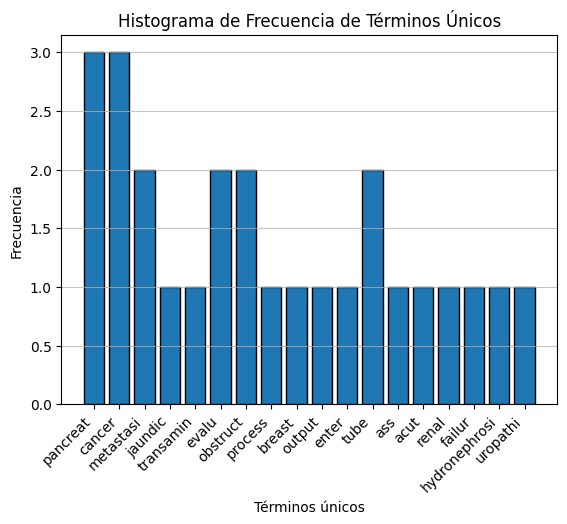

In [10]:
freq=FreqDist(normalized_texts)
print(freq)
top_tokens = freq.most_common()
print(top_tokens)

words = list(freq.keys())
frequencies = list(freq.values())

# Crear el gráfico de barras
plt.bar(words, frequencies, edgecolor='black')
plt.xlabel('Términos únicos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Frecuencia de Términos Únicos')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)
plt.show()

3. Generar los vectores para representar numéricamente cada documento de acuerdo
con las siguientes técnicas: <br>
a. One Hot Encoding o “Term Presence”.

In [11]:
term_presence_D1 = []
for w in words:
  if w in lemmatized_text_D1:
    term_presence_D1.append(1)
  else:
    term_presence_D1.append(0)
print("Term presence in Doc 1")
print(words)
print(lemmatized_text_D1)
print(term_presence_D1)

term_presence_D2 = []
for w in words:
  if w in lemmatized_text_D2:
    term_presence_D2.append(1)
  else:
    term_presence_D2.append(0)
print("\nTerm presence in Doc 2")
print(words)
print(lemmatized_text_D2)
print(term_presence_D2)

term_presence_D3 = []
for w in words:
  if w in lemmatized_text_D3:
    term_presence_D3.append(1)
  else:
    term_presence_D3.append(0)
print("\nTerm presence in Doc 3")
print(words)
print(lemmatized_text_D3)
print(term_presence_D3)

Term presence in Doc 1
['pancreat', 'cancer', 'metastasi', 'jaundic', 'transamin', 'evalu', 'obstruct', 'process', 'breast', 'output', 'enter', 'tube', 'ass', 'acut', 'renal', 'failur', 'hydronephrosi', 'uropathi']
['pancreat', 'cancer', 'metastasi', 'jaundic', 'transamin', 'evalu', 'obstruct', 'process']
[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Term presence in Doc 2
['pancreat', 'cancer', 'metastasi', 'jaundic', 'transamin', 'evalu', 'obstruct', 'process', 'breast', 'output', 'enter', 'tube', 'ass', 'acut', 'renal', 'failur', 'hydronephrosi', 'uropathi']
['pancreat', 'breast', 'cancer', 'output', 'enter', 'tube', 'ass', 'tube']
[1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]

Term presence in Doc 3
['pancreat', 'cancer', 'metastasi', 'jaundic', 'transamin', 'evalu', 'obstruct', 'process', 'breast', 'output', 'enter', 'tube', 'ass', 'acut', 'renal', 'failur', 'hydronephrosi', 'uropathi']
['metastasi', 'pancreat', 'cancer', 'acut', 'renal', 'failur', 'evalu', 'hyd

b. Cantidad de términos o “Term Count”.

In [12]:
term_count_D1 = [0] * len(words)
term_count_D2 = [0] * len(words)
term_count_D3 = [0] * len(words)

# Contar la frecuencia de cada término en el documento 1
for i, w in enumerate(words):
    term_count_D1[i] = lemmatized_text_D1.count(w)

# Contar la frecuencia de cada término en el documento 2
for i, w in enumerate(words):
    term_count_D2[i] = lemmatized_text_D2.count(w)

# Contar la frecuencia de cada término en el documento 3
for i, w in enumerate(words):
    term_count_D3[i] = lemmatized_text_D3.count(w)

# Imprimir los vectores de conteo de términos
print("Term count in Doc 1")
print(term_count_D1)
print("\nTerm count in Doc 2")
print(term_count_D2)
print("\nTerm count in Doc 3")
print(term_count_D3)

Term count in Doc 1
[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Term count in Doc 2
[1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 0, 0, 0, 0, 0]

Term count in Doc 3
[1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


c. Probabilidad del término.<br>
$P(t)={\text{Number of times term t appears in the corpus}\over \text{Total number of terms in the corpus}}$

In [13]:
#número de veces que aparecer termino y en el cuerpo
Total_terms=[0] * len(words)
for i, w in enumerate(words):
    Total_terms[i] = normalized_texts.count(w)
print("Veces que aparece t en el cuerpo")
print(Total_terms)
Total_number_terms=len(words)
Probability_t=[0] * len(words)
print("Total de terminos en el cuerpo: ", Total_number_terms)
for i, w in enumerate(Total_terms):
    Probability_t[i] = w/Total_number_terms
print("P(t)")
print(Probability_t)

Veces que aparece t en el cuerpo
[3, 3, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1]
Total de terminos en el cuerpo:  18
P(t)
[0.16666666666666666, 0.16666666666666666, 0.1111111111111111, 0.05555555555555555, 0.05555555555555555, 0.1111111111111111, 0.1111111111111111, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.1111111111111111, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555]


d. Frecuencia de términos o "term frecuency (TF)"<br>
$TF={\text{Number of times term t appears in the document }\over \text{Total number of terms in the corpus}}$

In [15]:
tf_d1=[0] * len(term_count_D1)
print("TF doc1")
print(term_count_D1)
for i, w in enumerate(term_count_D1):
    tf_d1[i] = w/len(lemmatized_text_D1)
print(tf_d1)

tf_d2=[0] * len(term_count_D1)
print("\nTF doc2")
print(term_count_D2)
for i, w in enumerate(term_count_D2):
    tf_d2[i] = w/len(lemmatized_text_D2)
print(tf_d2)

tf_d3=[0] * len(term_count_D1)
print("\nTF doc3")
print(term_count_D3)
for i, w in enumerate(term_count_D3):
    tf_d3[i] = w/len(lemmatized_text_D3)
print(tf_d3)

TF doc1
[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

TF doc2
[1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 0, 0, 0, 0, 0]
[0.125, 0.125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.125, 0.125, 0.125, 0.25, 0.125, 0.0, 0.0, 0.0, 0.0, 0.0]

TF doc3
[1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
[0.1, 0.1, 0.1, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.1, 0.1]


e. Frecuencia inversa de documentos IDF<br>
$IDF=\log{\text{Number of documents in corpus}\over \text{Number of documents where term appears}}$

In [16]:

import numpy as np
idf=[0] * len(words)
# Sumar los vectores de presencia de términos para cada documento
total_presence = [sum(presence) for presence in zip(term_presence_D1, term_presence_D2, term_presence_D3)]

# Contar cuántas veces aparece cada término en los documentos
term_document_count = [presence > 0 for presence in total_presence]
print(total_presence)

for i, w in enumerate (total_presence):
    idf[i] = np.log(3/w)

print(idf)

[3, 3, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0.0, 0.0, 0.4054651081081644, 1.0986122886681098, 1.0986122886681098, 0.4054651081081644, 0.4054651081081644, 1.0986122886681098, 1.0986122886681098, 1.0986122886681098, 1.0986122886681098, 1.0986122886681098, 1.0986122886681098, 1.0986122886681098, 1.0986122886681098, 1.0986122886681098, 1.0986122886681098, 1.0986122886681098]


f. $TF-IDF$

In [17]:
tf_idf_1=[0] * len(words)
for i, w in enumerate(idf):
   tf_idf_1[i] = tf_d1[i] * w
print(tf_idf_1)

tf_idf_2=[0] * len(words)
for i, w in enumerate(idf):
   tf_idf_2[i] = tf_d2[i] * w
print(tf_idf_2)

tf_idf_3=[0] * len(words)
for i, w in enumerate(idf):
   tf_idf_3[i] = tf_d3[i] * w
print(tf_idf_3)

[0.0, 0.0, 0.05068313851352055, 0.13732653608351372, 0.13732653608351372, 0.05068313851352055, 0.05068313851352055, 0.13732653608351372, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.13732653608351372, 0.13732653608351372, 0.13732653608351372, 0.27465307216702745, 0.13732653608351372, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.04054651081081644, 0.0, 0.0, 0.04054651081081644, 0.04054651081081644, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10986122886681099, 0.10986122886681099, 0.10986122886681099, 0.10986122886681099, 0.10986122886681099]
